In [1]:
####################################################################
#Compare my kmeans implementation to sklearn kmeans
####################################################################


import numpy as np
import sys

def compute_euclidean2(centroids, vector):
    return abs(np.sum(np.power((centroids-vector), 2), axis=1))

def initialize_centroids(k, data):
    """returns k centroids from the initial points"""

    rand = range(data.shape[0])
    np.random.shuffle(rand)
    centroids = data[rand[:k]]
    return centroids

def update(data, centroids):
    clusters=[[] for _ in range(centroids.shape[0])]
    new_centroids=np.zeros(shape=centroids.shape, dtype=np.float64)
    for vector in data:
        #Euclidean distance between vector and each centroid vector
        euclidean=compute_euclidean2(centroids, vector)
        index=np.argmin(euclidean)
        clusters[index].append(vector)
    for i in range(len(clusters)):
        num_vectors=len(clusters[i])
        new_centroids[i]=np.sum(np.array(clusters[i], dtype=np.float64), axis=0)/num_vectors
    return new_centroids, clusters

def compute_distance(clusters, centroids):
    total=0.0
    for i in range(centroids.shape[0]):
        total+=np.sum(compute_euclidean2(np.array(clusters[i]), centroids[i]), axis=0)
    return total
    return total

def single_kmeans(data, k, max_interation):
    centroids=initialize_centroids(k, data)
    total=sys.maxint
    iteration=0
    any_change=True
    while(any_change==True and iteration<max_interation):
        iteration+=1
        new_centroids, clusters=update(data, centroids)
        if(np.array_equal(new_centroids,centroids)):
            any_change=False
        else:
            centroids=new_centroids
        total=compute_distance(clusters, centroids)
    return total, centroids

#In order to avoid getting stcuk because of one bad centroids initialization
#We perform multiple single_kmeans and take the best result out of it
def my_kmeans(data, k, max_interation=300, num_single_kmeans=10):
    total=sys.maxint
    best_centroids=np.zeros(shape=(k,data.shape[1]))
    for _ in range(num_single_kmeans):
        current_total, current_centroids=single_kmeans(data, k, max_interation)
        if(current_total<total):
            total=current_total
            best_centroids=current_centroids
    return best_centroids.reshape(k,-1), total

In [7]:
import pandas as pd
import time
from sklearn.cluster import KMeans
X=np.array(pd.read_csv("/home/emmittxu/data-science-engineering-project/data/sample2.csv"))
k=5
s1=time.time()

kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
scikit=kmeans.cluster_centers_
sk_inertia=kmeans.inertia_ 
e1=time.time()
s2=time.time()
my_centroids, my_inertia=my_kmeans(X, k)
e2=time.time()
print("sklean inertia {}, my inertia {}".format(sk_inertia, my_inertia))
print("time sklearn/my_kmeans",(e1-s1)/(e2-s2))
print("**********************")
print("scikit learn kmeans")
print(np.sort(scikit, axis=0))
print("my kmeans")
print(np.sort(my_centroids, axis=0))

sklean inertia 1259628.09444, my inertia 1264133.83333
('time sklearn/my_kmeans', 0.9222480636695329)
**********************
scikit learn kmeans
[[   9.           51.33333333   62.375        51.6          24.           64.
    27.75         49.5          40.375        47.4          66.22222222
    95.8          76.33333333   68.8          28.4          31.25
    42.66666667   49.66666667   20.25         70.           28.        ]
 [  12.5          84.5          63.6          60.11111111  117.           74.
    83.           58.           59.           77.33333333   99.25
   106.33333333   88.75         73.875        49.           99.77777778
    93.5          54.4          82.625        79.77777778   83.        ]
 [  15.875       110.625        79.5          66.5         117.22222222
    79.55555556  100.44444444   61.2          86.8          96.875       123.25
   128.           90.75        120.66666667  103.75        109.625
    97.55555556  108.           92.2         112.         

In [16]:
m,n=np.random.randint(1,4000), np.random.randint(1,7000)
X=np.random.randn(m,n)

#X=np.array(pd.read_csv("/home/emmittxu/data-science-engineering-project/data/sample2.csv"))
k=8
s1=time.time()

kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
scikit=kmeans.cluster_centers_
sk_inertia=kmeans.inertia_ 
e1=time.time()
s2=time.time()
my_centroids, my_inertia=my_kmeans(X, k)
e2=time.time()
print("sklean inertia {}, my inertia {}".format(sk_inertia, my_inertia))
print("time sklearn/my_kmeans",(e1-s1)/(e2-s2))
print("**********************")
print("scikit learn kmeans")
print(np.sort(scikit, axis=0))
print("my kmeans")
print(np.sort(my_centroids, axis=0))

sklean inertia 2624160.93826, my inertia 2624254.5736
('time sklearn/my_kmeans', 0.15658504788888744)
**********************
scikit learn kmeans
[[-0.43398538 -0.18940644 -0.23152127 ..., -0.26210277 -0.13209384
  -0.60177238]
 [-0.04371113 -0.10011859 -0.12940433 ..., -0.16142488 -0.06809211
  -0.15325948]
 [-0.03199279 -0.03657856 -0.05603565 ..., -0.02138809 -0.00293119
  -0.03195184]
 ..., 
 [ 0.01795286  0.0700786   0.05624423 ...,  0.02674044  0.15943181
   0.02693935]
 [ 0.0641423   0.09083066  0.08380183 ...,  0.03690316  0.16698306
   0.14840851]
 [ 0.14401648  0.10644737  0.13338716 ...,  0.08856105  0.16842746
   0.1870718 ]]
my kmeans
[[-0.19049511 -0.08801262 -0.1791827  ..., -0.1607569  -0.1598068
  -0.13549018]
 [-0.08107261 -0.08610427 -0.04120635 ..., -0.14296524 -0.08342702
  -0.09250835]
 [-0.0017769  -0.06616514 -0.02234147 ..., -0.08351016 -0.0331449
  -0.04888104]
 ..., 
 [ 0.02957518  0.02589818  0.02371428 ..., -0.017975    0.11223983
   0.09364109]
 [ 0.0940017

In [ ]:
#########################################################################
#Validation on closest_to function
#########################################################################

In [3]:
from numpy.linalg import norm
import matplotlib.pyplot as plt

#Calculate Euclidean distance using matrix vectorization
#This substantially increases computation efficiency when matrix dimension is large
def compute_euclidean(data, row_i):
    return np.sqrt(np.sum(np.power((data-data[row_i]), 2), axis=1))

def find_min_distance(row_i, euclidean):
    min_value=sys.maxint
    m=euclidean.shape[0]
    closest_index=0
    for i in range(m):
        if(i==row_i):
            continue
        if(euclidean[i]<min_value):
            min_value=euclidean[i]
            closest_index=i
    if(row_i<closest_index):
        return row_i, closest_index, min_value
    else:
        return closest_index, row_i, min_value

def find_closest(matrix, row_i):
    distance=sys.maxint
    best_i=None
    for i in range(matrix.shape[0]):
        if(i==row_i):
            continue
        tmp=norm(matrix[i]-matrix[row_i])
        if(tmp<distance):
            distance=tmp
            best_i=i
    if(row_i<best_i):
        return row_i, best_i, distance
    else:
        return best_i, row_i, distance

def my_find_closest(data, row_i):
    euclidean=compute_euclidean(data, row_i)
    return find_min_distance(row_i, euclidean)

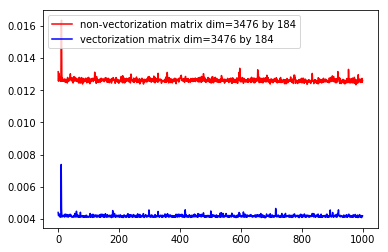

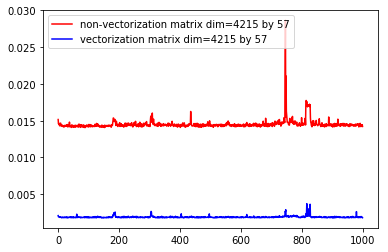

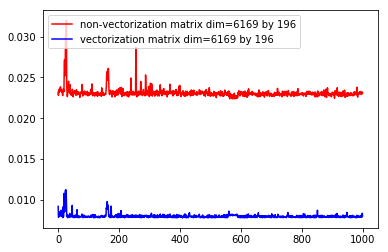

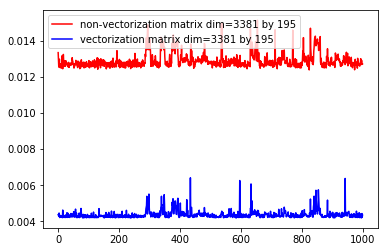

In [20]:
import time
import matplotlib.pyplot as plt
import numpy as np
import sys

for _ in range(4):
    #Set matrix dimension
    m,n=np.random.randint(1,10000), np.random.randint(1,200)
    matrix=np.random.randn(m,n)
    time1=[]
    time2=[]
    for i in range(1000):
        #Randomly set row_i
        row_i=np.random.randint(0,m)
        s1=time.time()
        res1=find_closest(matrix, row_i)
        e1=time.time()
        time1.append(e1-s1)
        s2=time.time()
        res2=my_find_closest(matrix, row_i)
        e2=time.time()
        time2.append(e2-s2)
        flag1=res1[:2]==res2[:2]
        flag2=abs(res1[2]-res2[2])<1e-5
        if(not (flag1 and flag2)):
            print("*********************")
            print("res1")
            print(res1)
            print("res2")
            print(res2)
            print("Test {} time1/time2 {}".format(i, (e1-s1)/(e2-s2)))
    plt.plot(time1, '-r', label="non-vectorization matrix dim=%s by %s" %(m, n))
    plt.plot(time2, '-b', label="vectorization matrix dim=%s by %s" %(m, n))
    plt.legend(loc='upper left')
    plt.show()